In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dados_finais/atracacao_fato.csv", sep=";")

## Quantidade de atracações por região

In [11]:
estados_nordeste = ["MA", "PI", "CE", "RN", "PB", "PE", "AL", "SE", "BA"]

contagem_uf = df["SGUF"].value_counts()

quant_ce = contagem_uf.get("CE", 0)  # Ceará
quant_ne = contagem_uf.loc[contagem_uf.index.intersection(estados_nordeste)].sum()  # Nordeste
quant_br = contagem_uf.sum()  # Brasil

labels = ["Ceará", "Nordeste", "Brasil"]
values = [quant_ce, quant_ne, quant_br]

cores = ["#1f77b4", "#2ca02c", "#ff7f0e"]

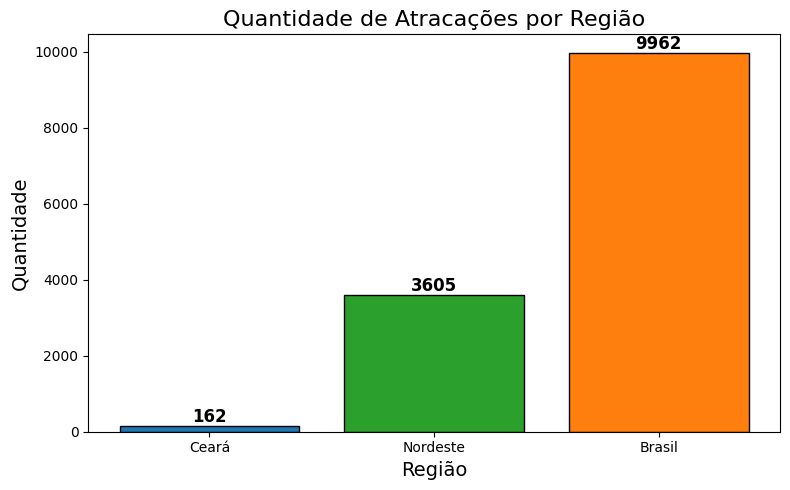

In [12]:
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=cores, edgecolor="black")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, 
             round(yval, 0), ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.xlabel("Região", fontsize=14)
plt.ylabel("Quantidade", fontsize=14)
plt.title("Quantidade de Atracações por Região", fontsize=16)
plt.tight_layout() 

plt.show()

# ----------------------------------------------------------------

## Tempo de espera e tempo de atracação

In [16]:
df["Data_Chegada"] = pd.to_datetime(df["Data_Chegada"])
df["Data_Atracacao"] = pd.to_datetime(df["Data_Atracacao"])
df["Data_Desatracacao"] = pd.to_datetime(df["Data_Desatracacao"])

df["Tempo_Espera"] = (df["Data_Atracacao"] - df["Data_Chegada"]).dt.total_seconds() / 3600  # Tempo em horas
df["Tempo_Atracado"] = (df["Data_Desatracacao"] - df["Data_Atracacao"]).dt.total_seconds() / 3600  # Tempo em horas

df = df[df["Data_Atracacao"].dt.year.isin([2021, 2022, 2023])]

df["Ano_Mes"] = df["Data_Atracacao"].dt.to_period("M")
df_grouped = df.groupby("Ano_Mes")[["Tempo_Espera", "Tempo_Atracado"]].sum()

## Ceará

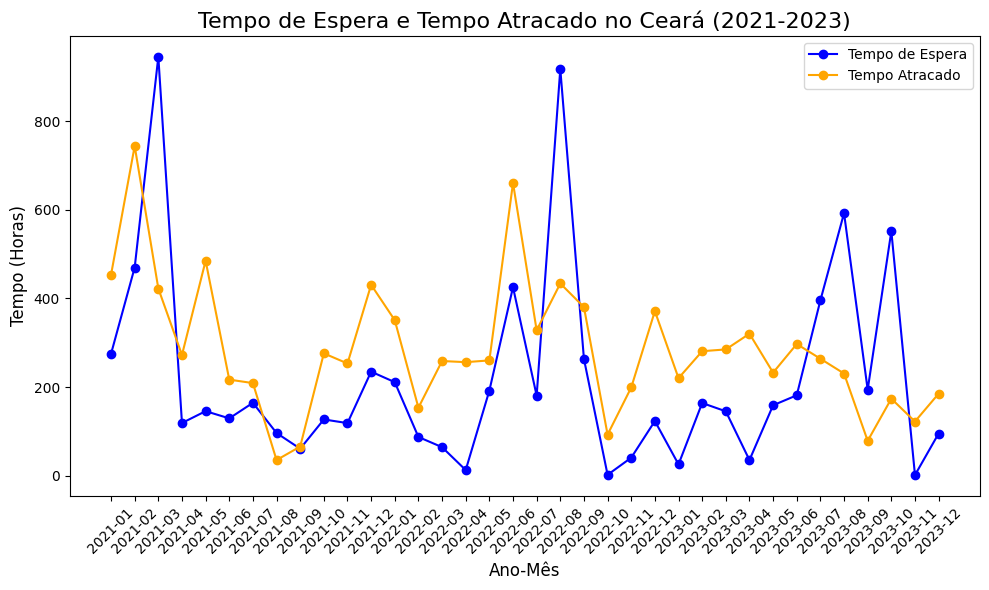

In [19]:
df_ceara = df[df["SGUF"] == "CE"]
df_ceara_grouped = df_ceara.groupby("Ano_Mes")[["Tempo_Espera", "Tempo_Atracado"]].sum()

plt.figure(figsize=(10, 6))
plt.plot(df_ceara_grouped.index.astype(str), df_ceara_grouped["Tempo_Espera"], label="Tempo de Espera", color="blue", marker="o")
plt.plot(df_ceara_grouped.index.astype(str), df_ceara_grouped["Tempo_Atracado"], label="Tempo Atracado", color="orange", marker="o")
plt.title("Tempo de Espera e Tempo Atracado no Ceará (2021-2023)", fontsize=16)
plt.xlabel("Ano-Mês", fontsize=12)
plt.ylabel("Tempo (Horas)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Nordeste

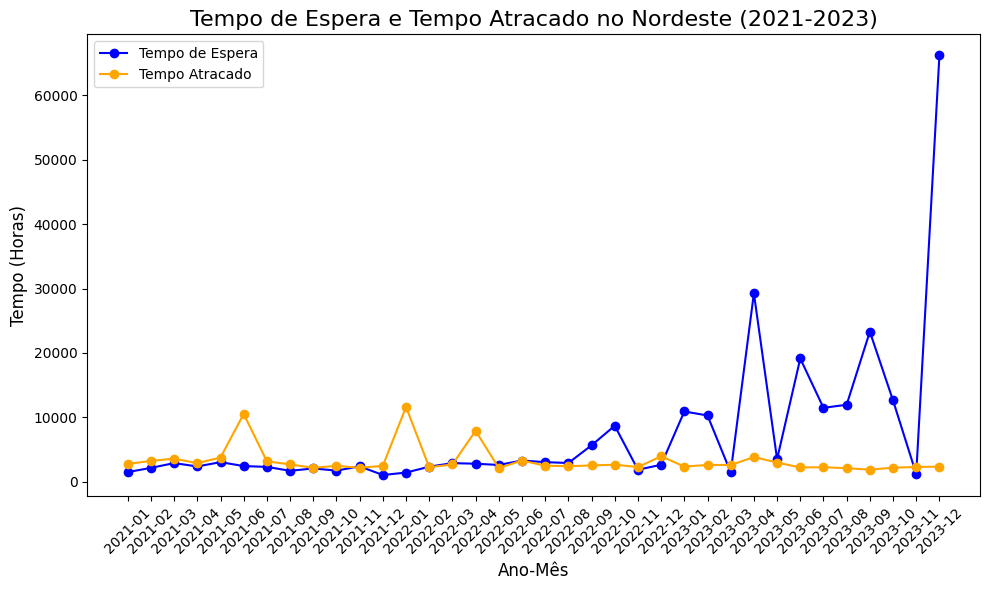

In [21]:
df_nordeste = df[df["SGUF"].isin(estados_nordeste)]
df_nordeste_grouped = df_nordeste.groupby("Ano_Mes")[["Tempo_Espera", "Tempo_Atracado"]].sum()

plt.figure(figsize=(10, 6))
plt.plot(df_nordeste_grouped.index.astype(str), df_nordeste_grouped["Tempo_Espera"], label="Tempo de Espera", color="blue", marker="o")
plt.plot(df_nordeste_grouped.index.astype(str), df_nordeste_grouped["Tempo_Atracado"], label="Tempo Atracado", color="orange", marker="o")
plt.title("Tempo de Espera e Tempo Atracado no Nordeste (2021-2023)", fontsize=16)
plt.xlabel("Ano-Mês", fontsize=12)
plt.ylabel("Tempo (Horas)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Brasil (total)

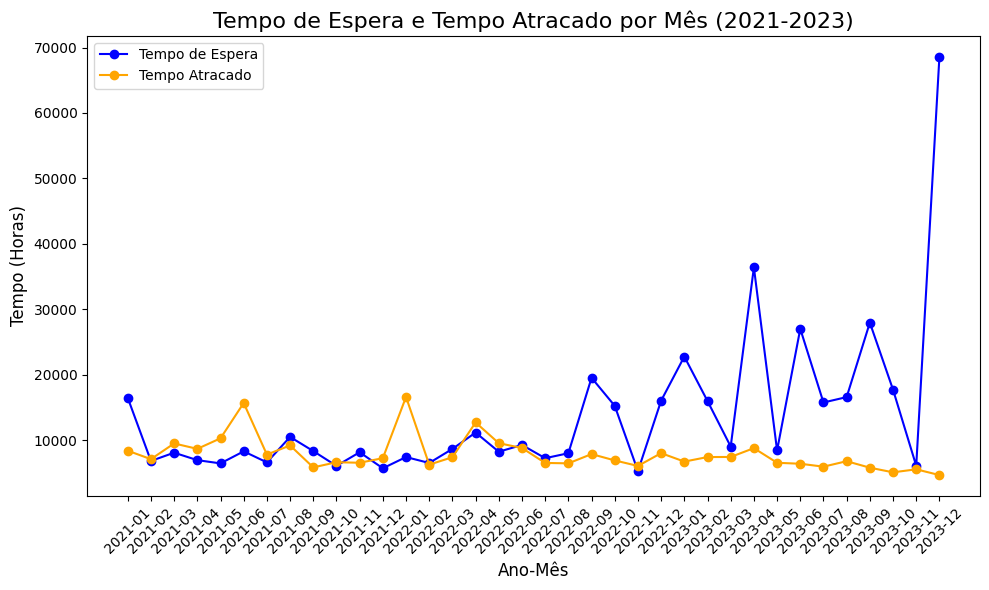

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(df_grouped.index.astype(str), df_grouped["Tempo_Espera"], label="Tempo de Espera", color="blue", marker="o")

plt.plot(df_grouped.index.astype(str), df_grouped["Tempo_Atracado"], label="Tempo Atracado", color="orange", marker="o")

plt.title("Tempo de Espera e Tempo Atracado por Mês (2021-2023)", fontsize=16)
plt.xlabel("Ano-Mês", fontsize=12)
plt.ylabel("Tempo (Horas)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()